In [5]:
import numpy as np
import random
import math

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [6]:
Lengt = 1
dx = 0.01
Time = 20
dt = 0.01

umax = 0.005

TN = (int)(Time/dt)
Nx = (int)(Lengt/dx)

z = np.zeros(shape=(TN, Nx))
for i in range(Nx):
  if i < int(Nx / 2):
    z[0][i] = i * dx * umax / (Lengt/2) 
  elif i > int(Nx / 2):
    z[0][i] = (Nx - i) * dx * umax / (Lengt/2) 
  elif i == int(Nx / 2):
    z[0][i] = umax 

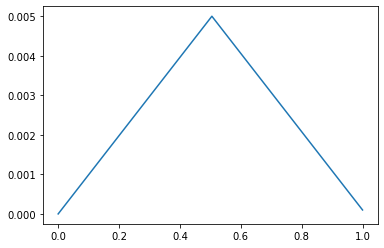

In [7]:
x = np.linspace(0, Lengt, Nx)

plt.plot(x, z[0])

## Изначальная формула
![title](Formula.png)
## Формула для нахождения U(i+1,j)
![title](Formula2.png)

In [8]:
O = 2

a = dt / dx / O

print(a)
a = a**2

for t in range(1, TN):
    for i in range(1, Nx-1):
        if t > 1:
            z[t][i] = a * (z[t - 1][i + 1] - 2*z[t - 1][i] + z[t - 1][i - 1]) + 2*z[t-1][i] - z[t - 2][i]
        else:
            z[t][i] = z[0][i]


0.5


In [ ]:
fig = go.Figure(data=[go.Surface(z=z, x=x, y=np.linspace(0, Time, TN), colorscale = 'Rainbow')])

fig.update_layout(title='Struna',
                  autosize=False,
                  width=1000, height=1000)

fig.update_layout(scene = dict(zaxis = dict(range=[-0.02,0.02],),))


fig.update_layout(width=800, height=800)
fig.show()

#Результат
![](Plot1.png)

In [11]:
frames = []
for i in range(TN):
  frames.append(go.Frame(data=[go.Scatter(x=x, y=z[i])]))

In [10]:
!pip install plotly-gif --user

  Using cached plotly_gif-0.0.3-py3-none-any.whl (7.7 kB)
  Using cached Pillow-9.1.0-cp39-cp39-win_amd64.whl (3.3 MB)


In [35]:
fig = go.Figure(data=[go.Scatter(x=np.linspace(0, Lengt, (int)(Lengt/dx)), y=z[0])],
                layout=go.Layout(
                    xaxis=dict(range=[0, Lengt], autorange=False),
                    yaxis=dict(range=[-0.01, 0.013], autorange=False),
                    title="Start Title",
                    updatemenus=[dict(
                        type="buttons",
                        buttons=[dict(label="Play",
                                      method="animate",
                                      args=[None, {"frame": {"duration": 10, "redraw": False},
                                                   "fromcurrent": True, "transition": {"duration": 0,
                                                                                       "easing": "quadratic-in-out"}}]),
                                 dict(label="Pause",
                                      method="animate",
                                      args=[[None], {"frame": {"duration": 0, "redraw": False},
                                                     "mode": "immediate",
                                                     "transition": {"duration": 0}}]

                                      )])]
                ),
                frames=frames
                )

fig.update_layout(title='Struna', autosize=False,
                  width=1000, height=500)

fig.show()

## Тут будет выведена анимация
## Ниже сохранение этой анимации в график

In [35]:
import gif

@gif.frame
def plot(i):
    f = go.Figure(data=[go.Scatter(x=x, y=z[i])],
                  layout=go.Layout(
                      xaxis=dict(range=[0, Lengt], autorange=False),
                      yaxis=dict(range=[-0.01, 0.01], autorange=False)))
    return f

# Construct list of frames
frames = []
for i in range(TN):
    frame = plot(i)
    frames.append(frame)

gif.save(frames, 'Gif1.gif', duration=10)

## Процесс колебания
![](ezgif.com-gif-maker.gif)